# Descriptive Analysis

## List of Team Members



- Anjali Rathore

- Bhargavi Pedapatti

- Chiraag Kumar

- Parmarth Matta

- Raktim Prakash Srivastava

# Context

Information on more than 180,000 Terrorist Attacks

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

# Content

Geography: Worldwide

Time period: 1970-2017, except 1993

Unit of analysis: Attack

Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes

Sources: Unclassified media articles (Note: Please interpret changes over time with caution. Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations in access to media coverage over both time and place.)

Definition of terrorism:

"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

# Fire the system !

In [1]:

# ! pip install basemap
# ! pip install chart-studio

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from chart_studio import plotly
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
import codecs
from subprocess import check_output



Import Dataset

In [2]:
# Original Dataset

terror_df=pd.read_csv('https://media.githubusercontent.com/media/Bhargavi-6/Group16_MLUL2_Assignment/main/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1', low_memory=False)

terror_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [3]:
terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

terror_df

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
terror_df.isnull().sum()

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [5]:

# Subset the original df and filter out columns of interest for EDA

terror=terror_df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive', 'suicide']]

terror['casualities']=terror['Killed']+terror['Wounded']

terror.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,suicide,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,0,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,0,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0,NaN


In [6]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
suicide             0
casualities     16874
dtype: int64

### Basic Analysis

In [7]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


#### Let's check for the Total Terrorist Activities each year

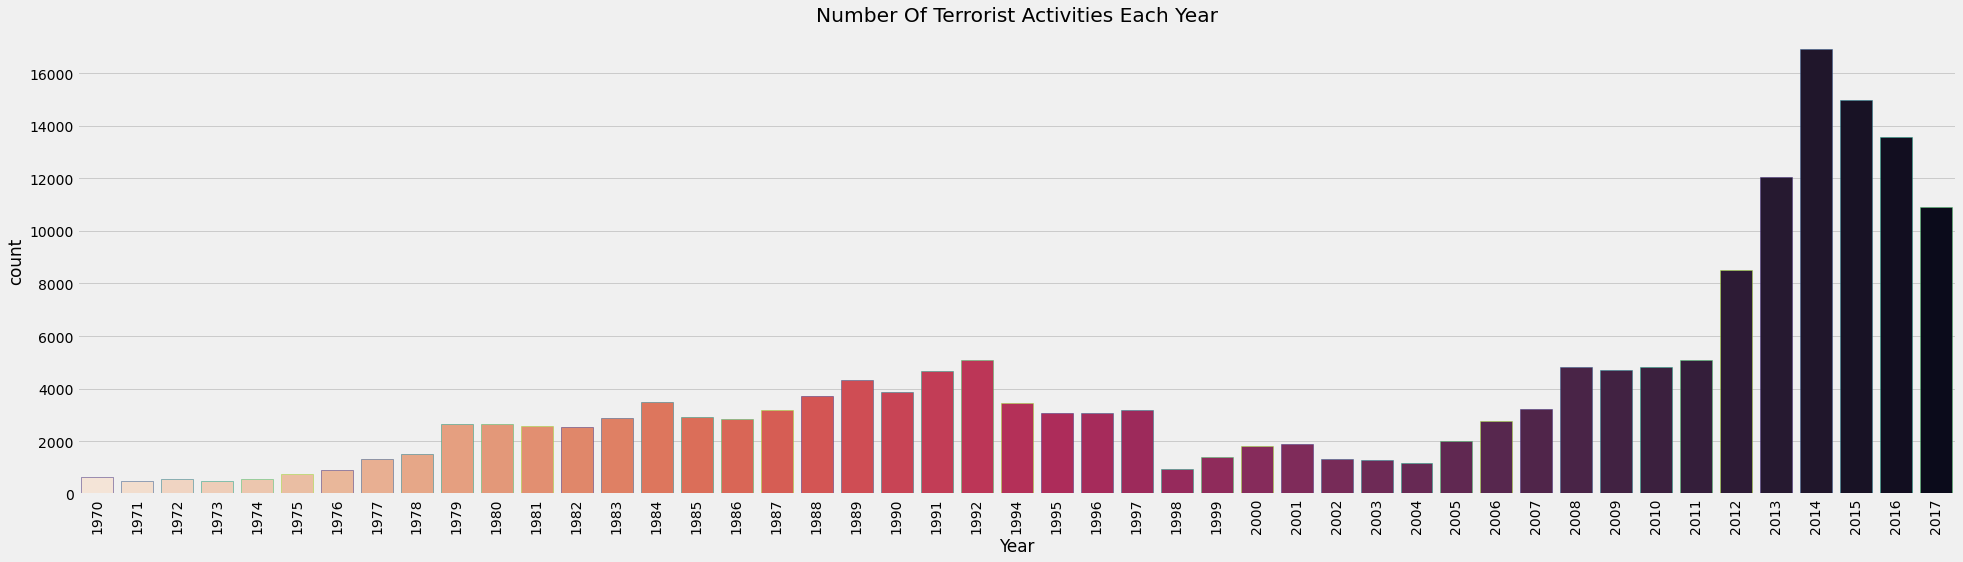

In [8]:

plt.subplots(figsize=(30,8))
sns.countplot('Year',data=terror,palette='rocket_r',edgecolor=sns.color_palette('viridis',6))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

The number of Terrorist activities have increased sharply post 2000.

#### Check for the methods used by the Terrorists

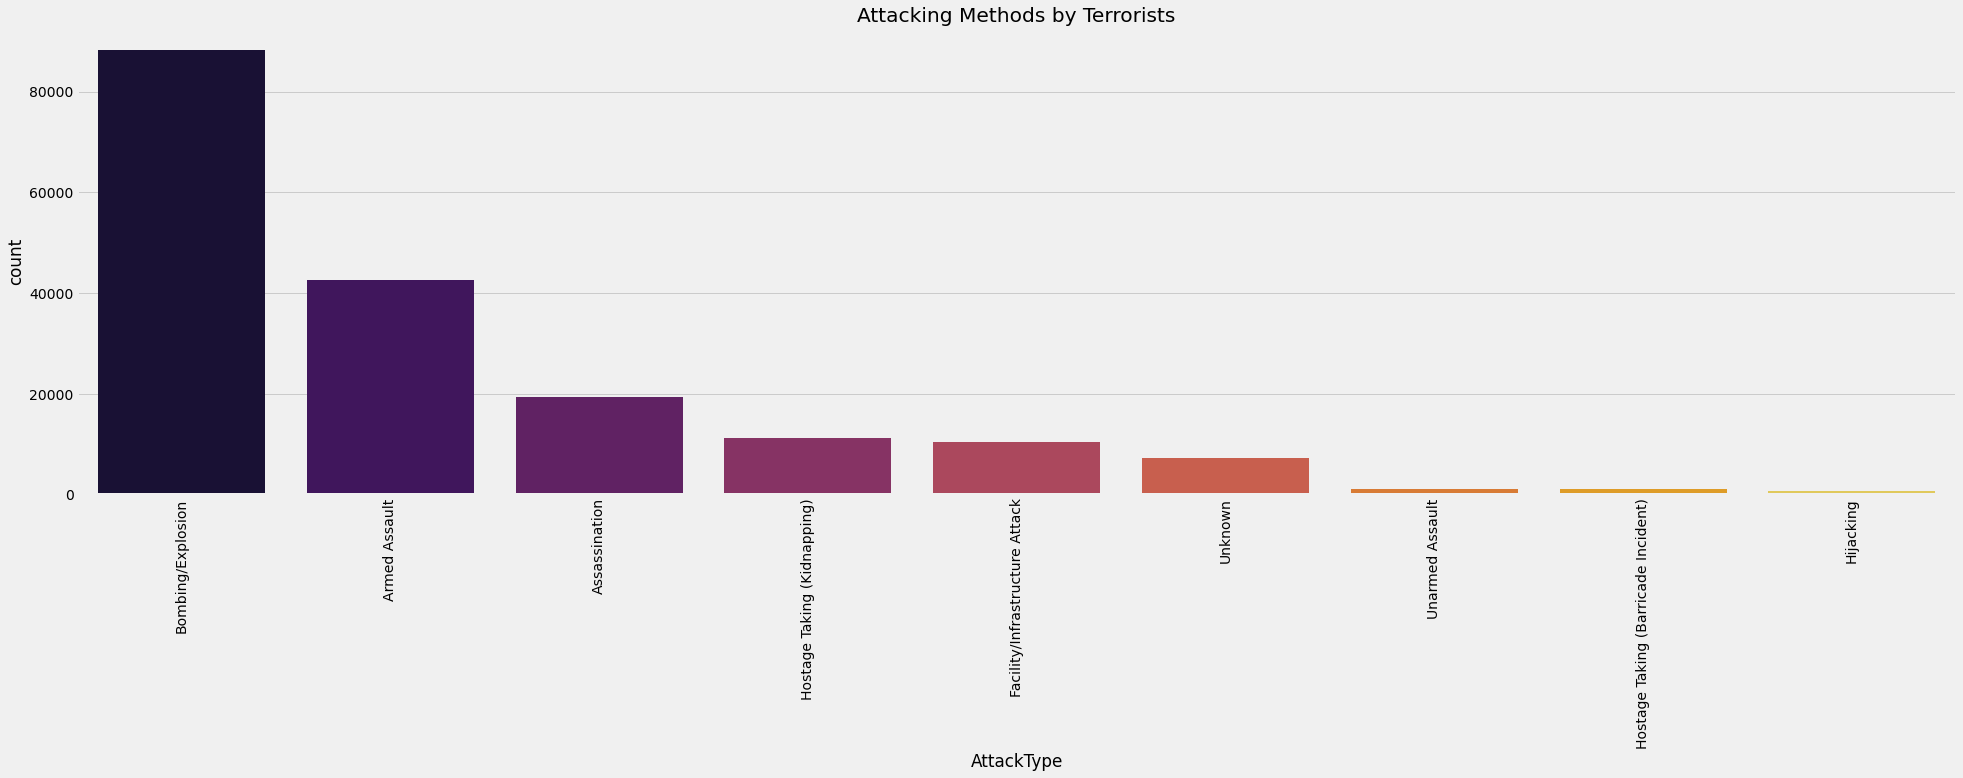

In [9]:

plt.subplots(figsize=(30,8))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

#### Check for Favorite Targets

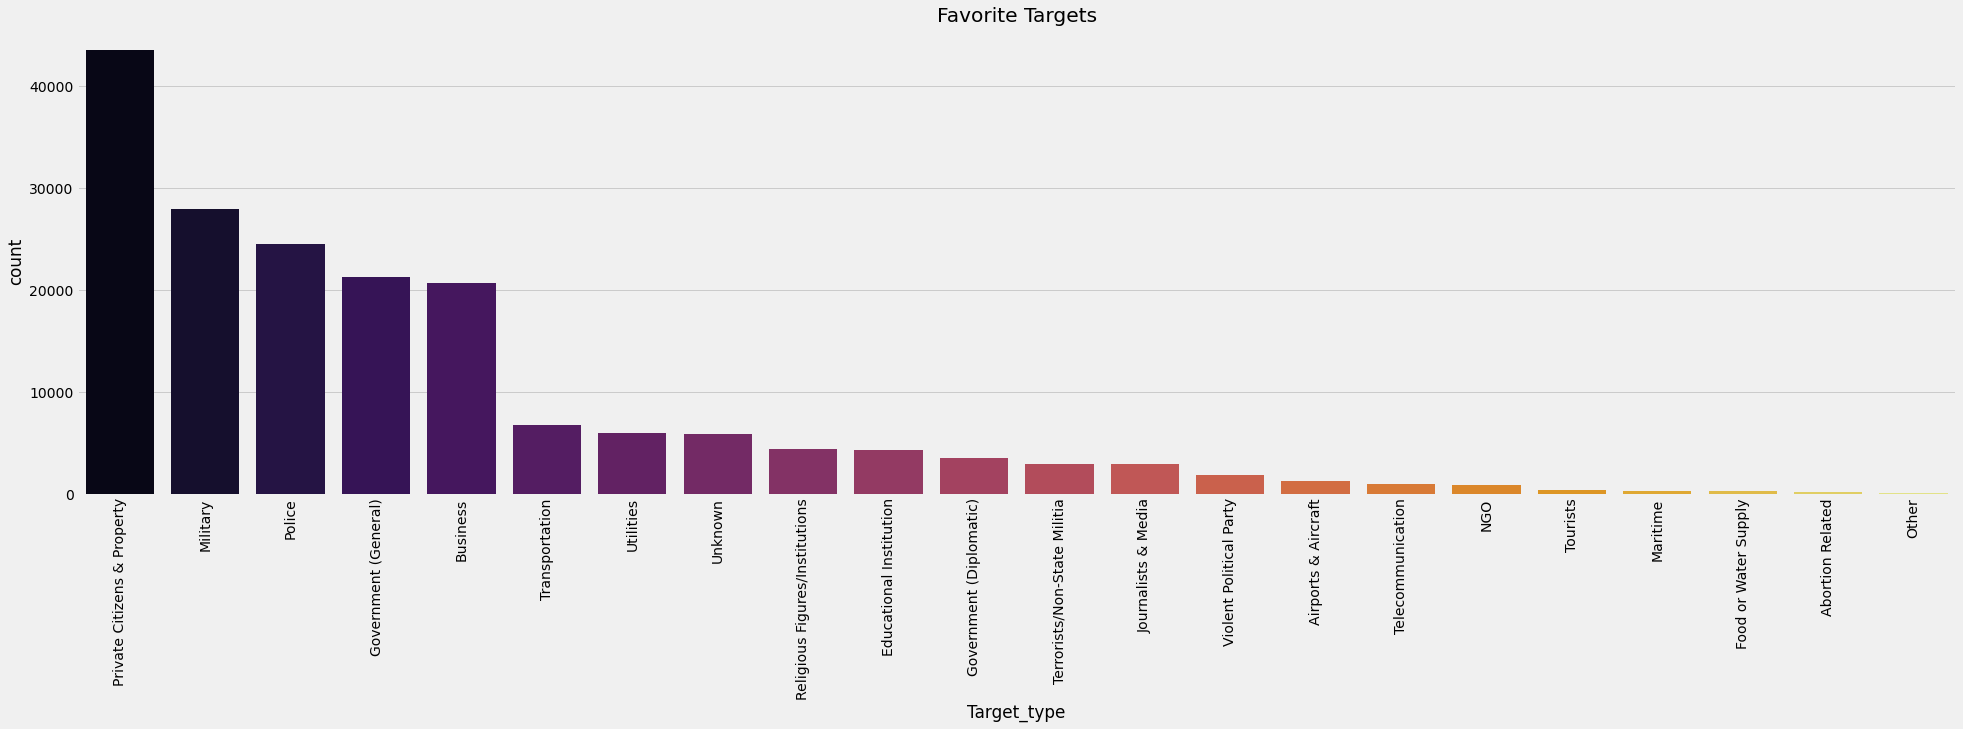

In [10]:

plt.subplots(figsize=(30,8))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

### Global Terror Attacks

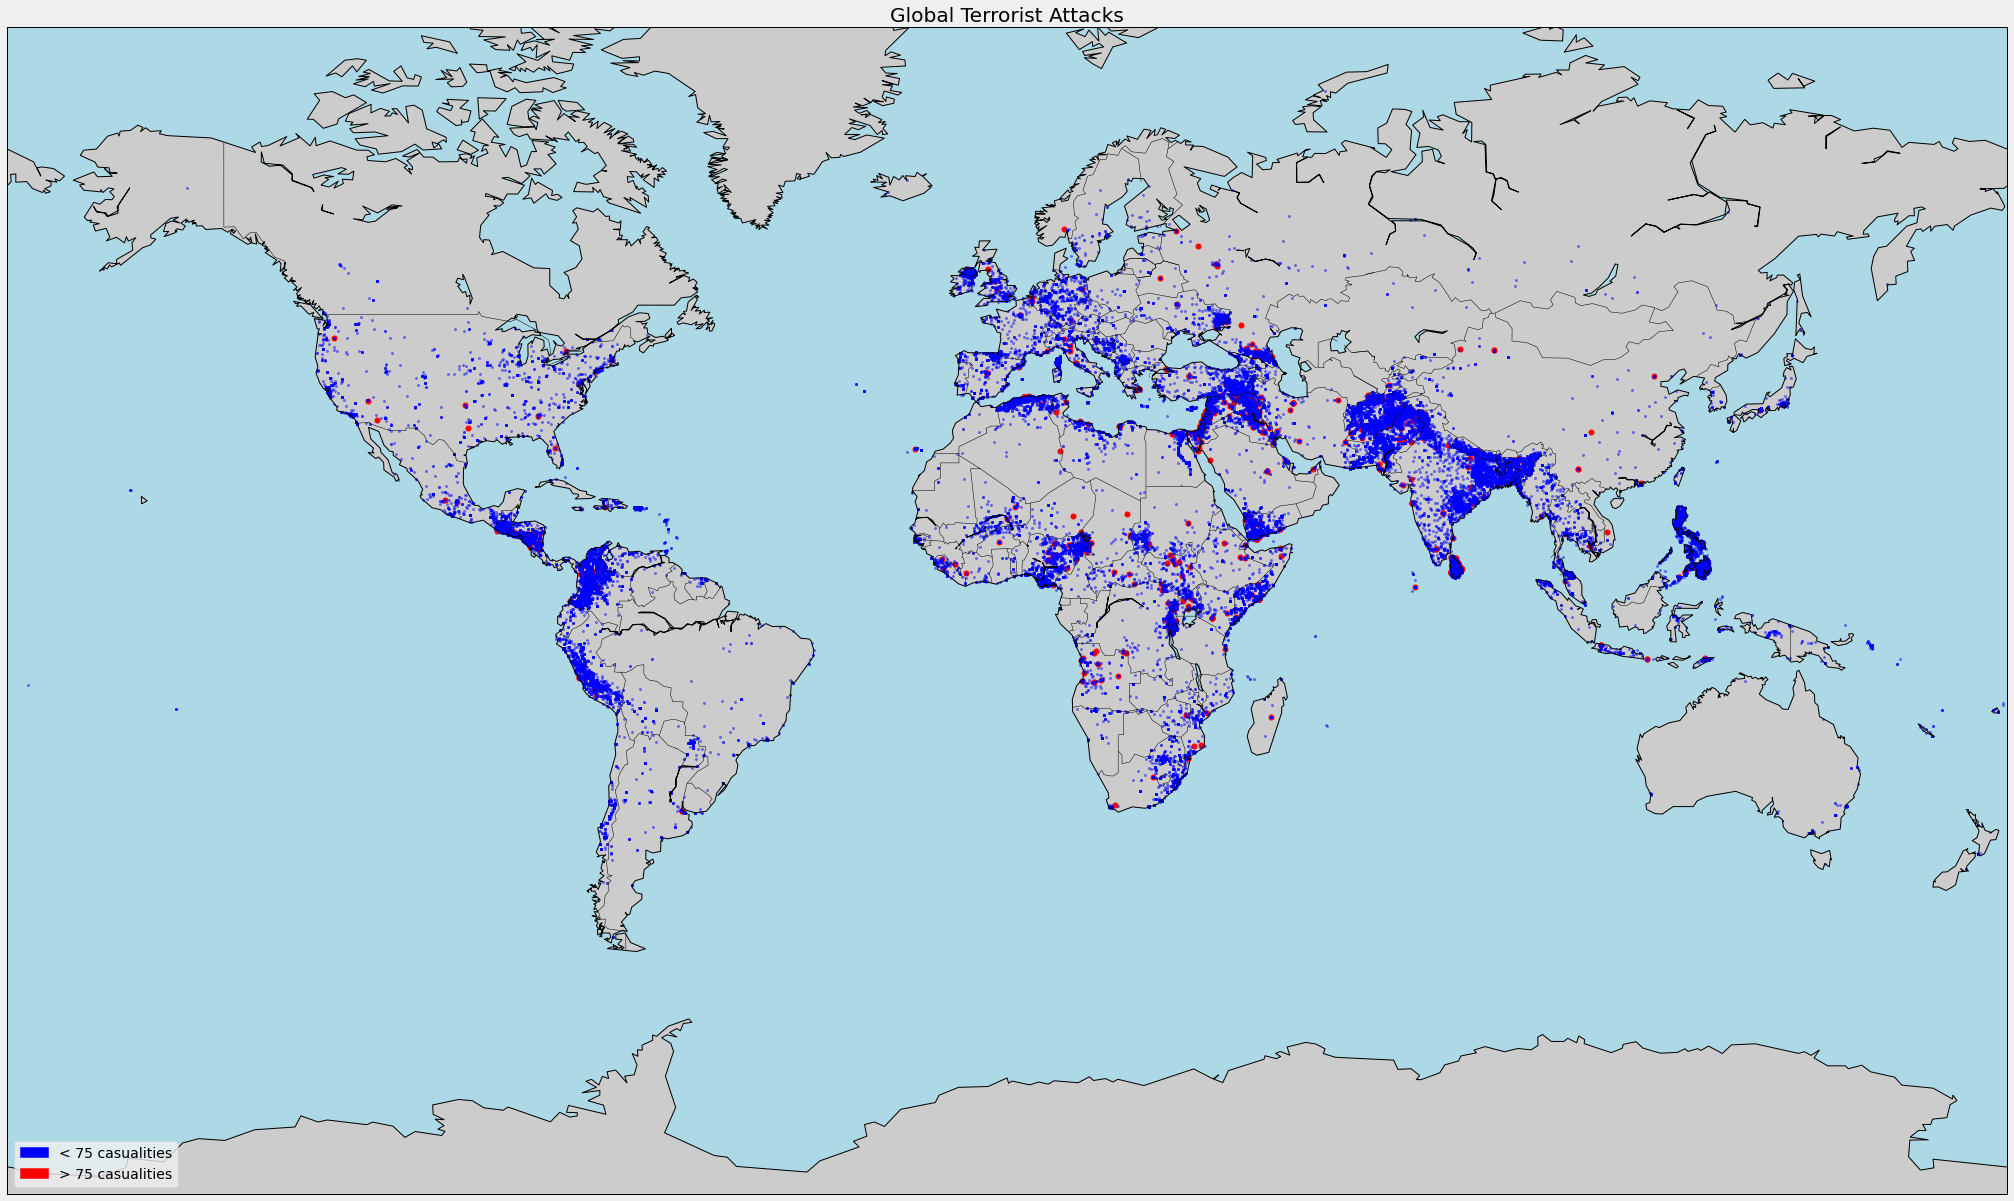

In [11]:

m3 = Basemap(projection='mill', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c', lat_0=True, lat_1=True)

lat_100=list(terror[terror['casualities']>=75].latitude)
long_100=list(terror[terror['casualities']>=75].longitude)

x_100 , y_100 = m3(long_100,lat_100)

m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(terror[terror['casualities']<75].latitude)
long_=list(terror[terror['casualities']<75].longitude)
x_ , y_ = m3(long_,lat_)

m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)

m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='lightblue')
m3.drawmapboundary(fill_color='lightblue')

fig=plt.gcf()
fig.set_size_inches(50,20)
plt.title('Global Terrorist Attacks')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 75 casualities"),
                    mpatches.Patch(color='red',label='> 75 casualities')])
plt.show()

The above basemap shows the places of attacks. The red circles are those that had more than 75 casualities(wounded+killed).

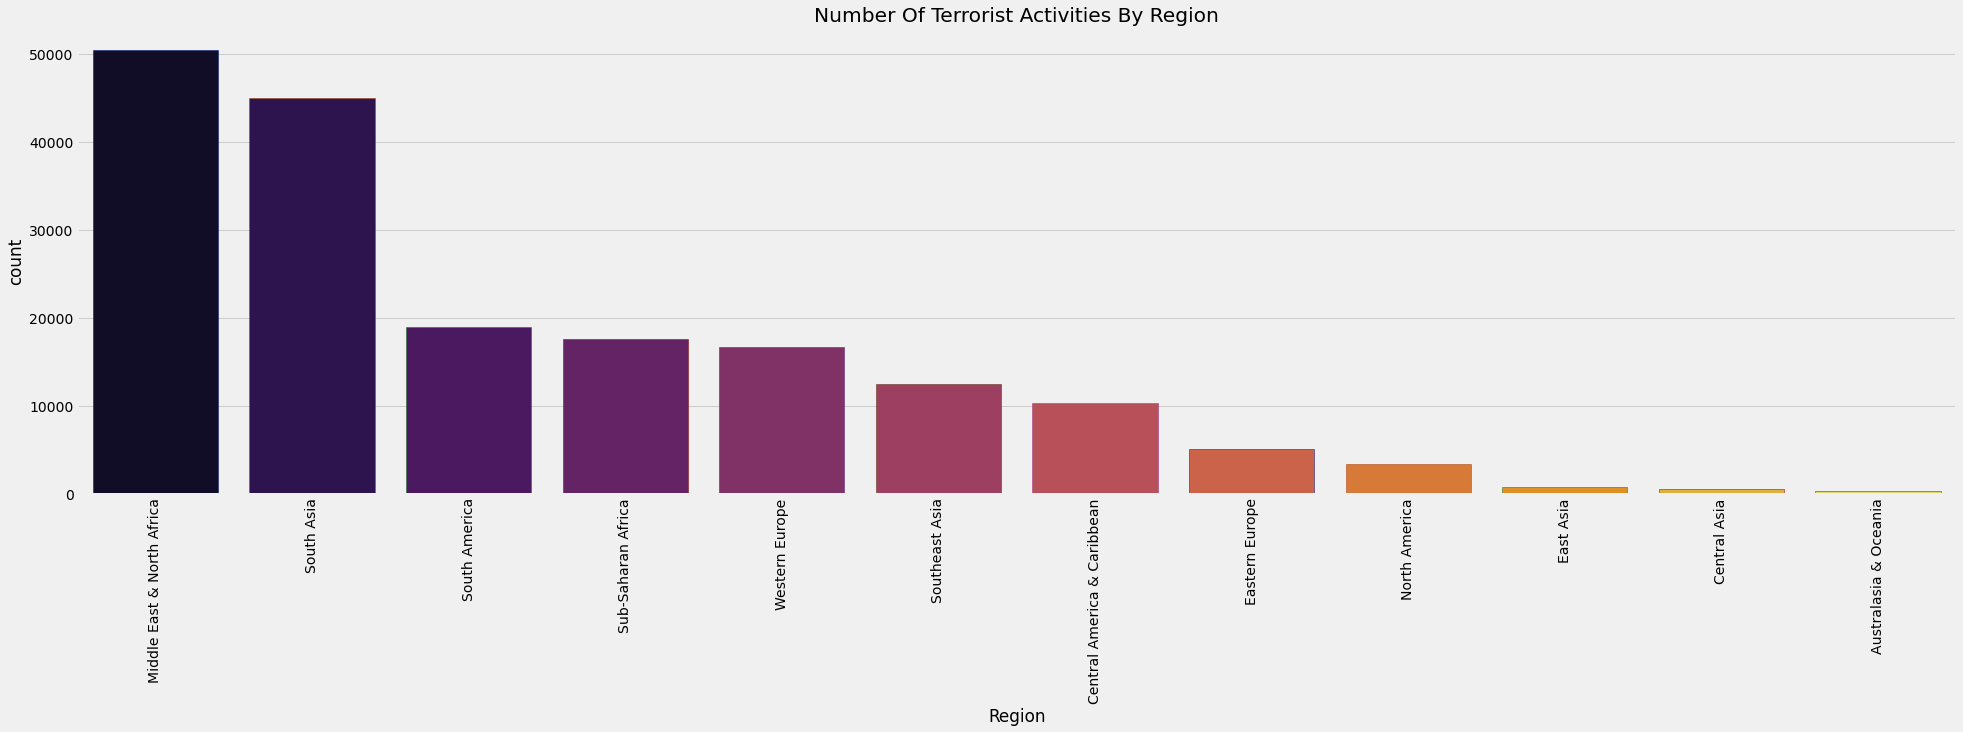

In [12]:

plt.subplots(figsize=(30,8))
sns.countplot('Region',data=terror,palette='inferno',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

Middle East and North Africa are the most terrorism prone regions followed by South Asia. The Australian Region have experienced very few terrorist events. Collectively we can say that The African and Asian Continent experience the highest terrorist attacks.

#### Trend in Terrorist Activities


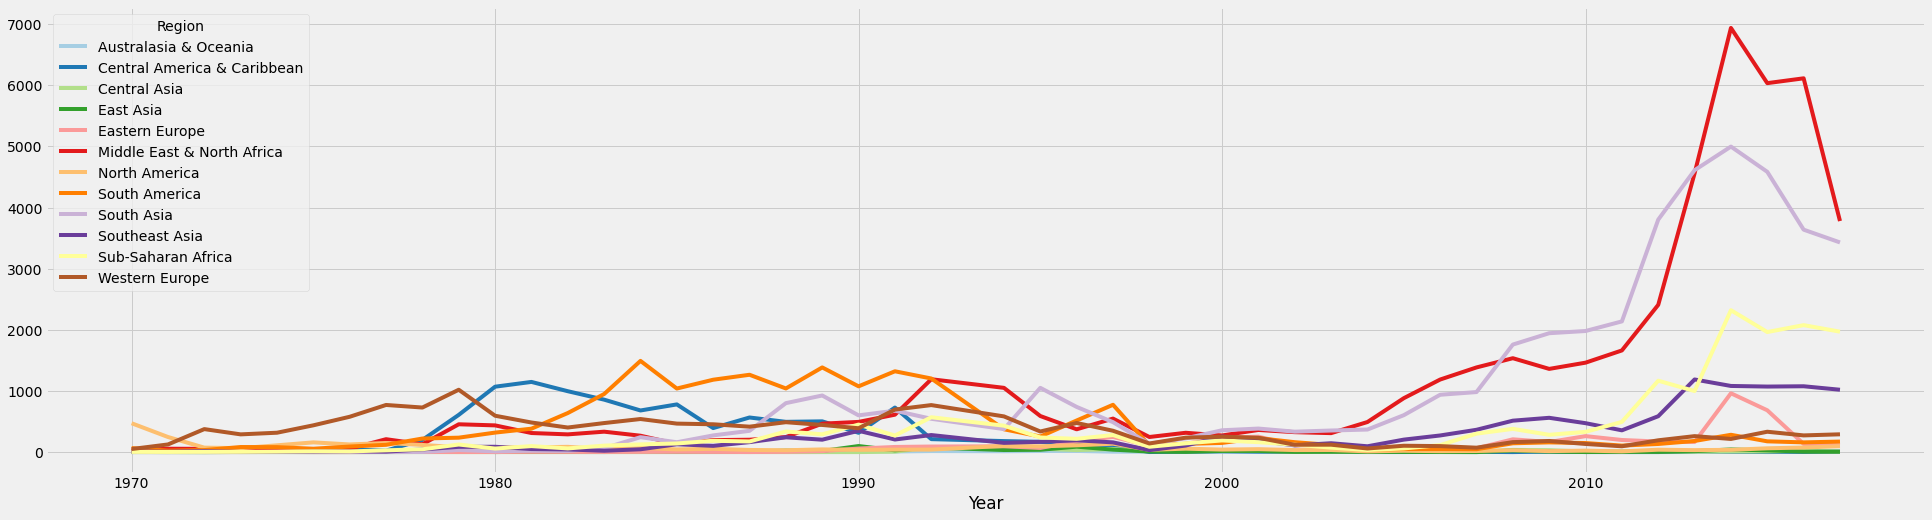

In [13]:

terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Paired',12))
fig=plt.gcf()
fig.set_size_inches(30,8)
plt.show()

#### Attack Type Vs Region

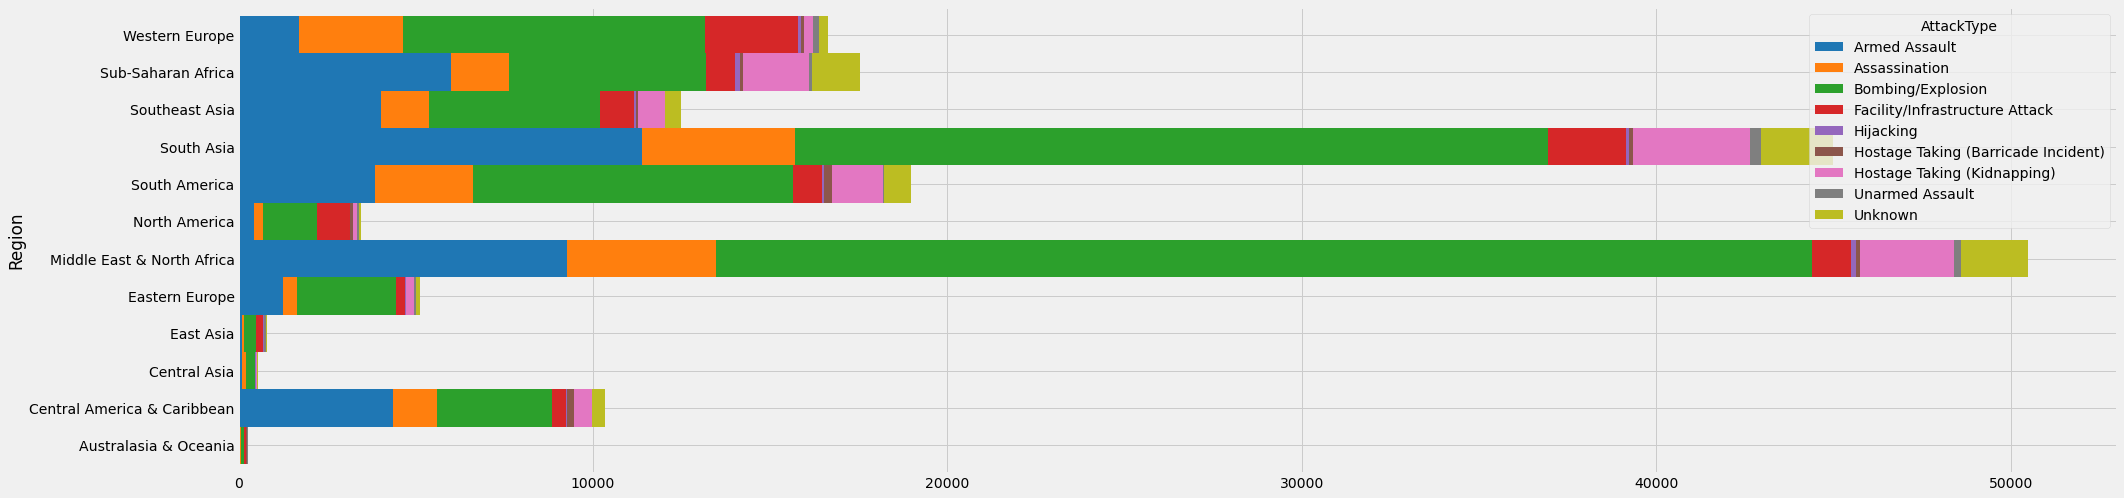

In [14]:

pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('tab10',9))
fig=plt.gcf()
fig.set_size_inches(30,8)
plt.show()

Bombing and Armed assaults, as seen above are the most prominent types of Attack irrespective of Regions.

#### Terrorism by Country

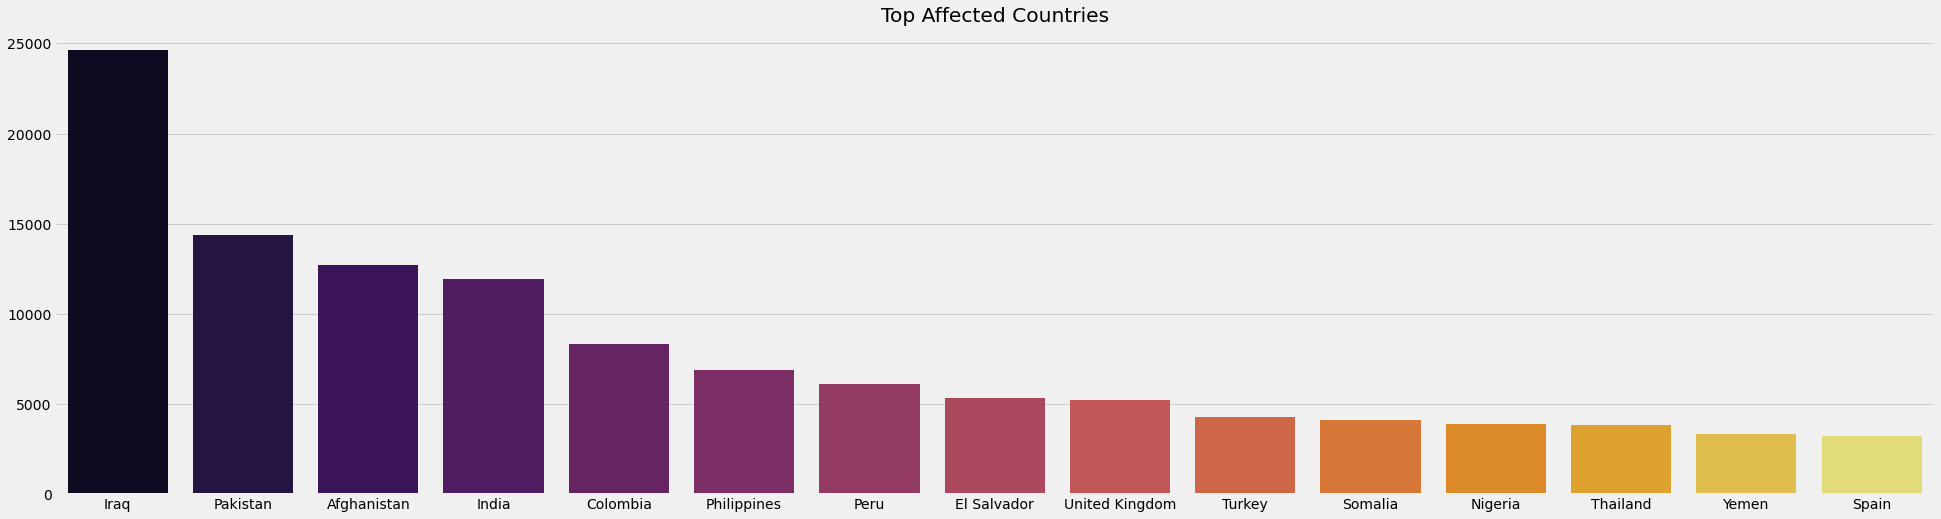

In [15]:

plt.subplots(figsize=(30,8))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

Iraq has witnessed a very large number of terrorist activities followed by Pakistan. One thing to note is the countries with highest attacks, are mostly densely populated countries, thus it will eventually claim many lives.

#### Attack vs Killed

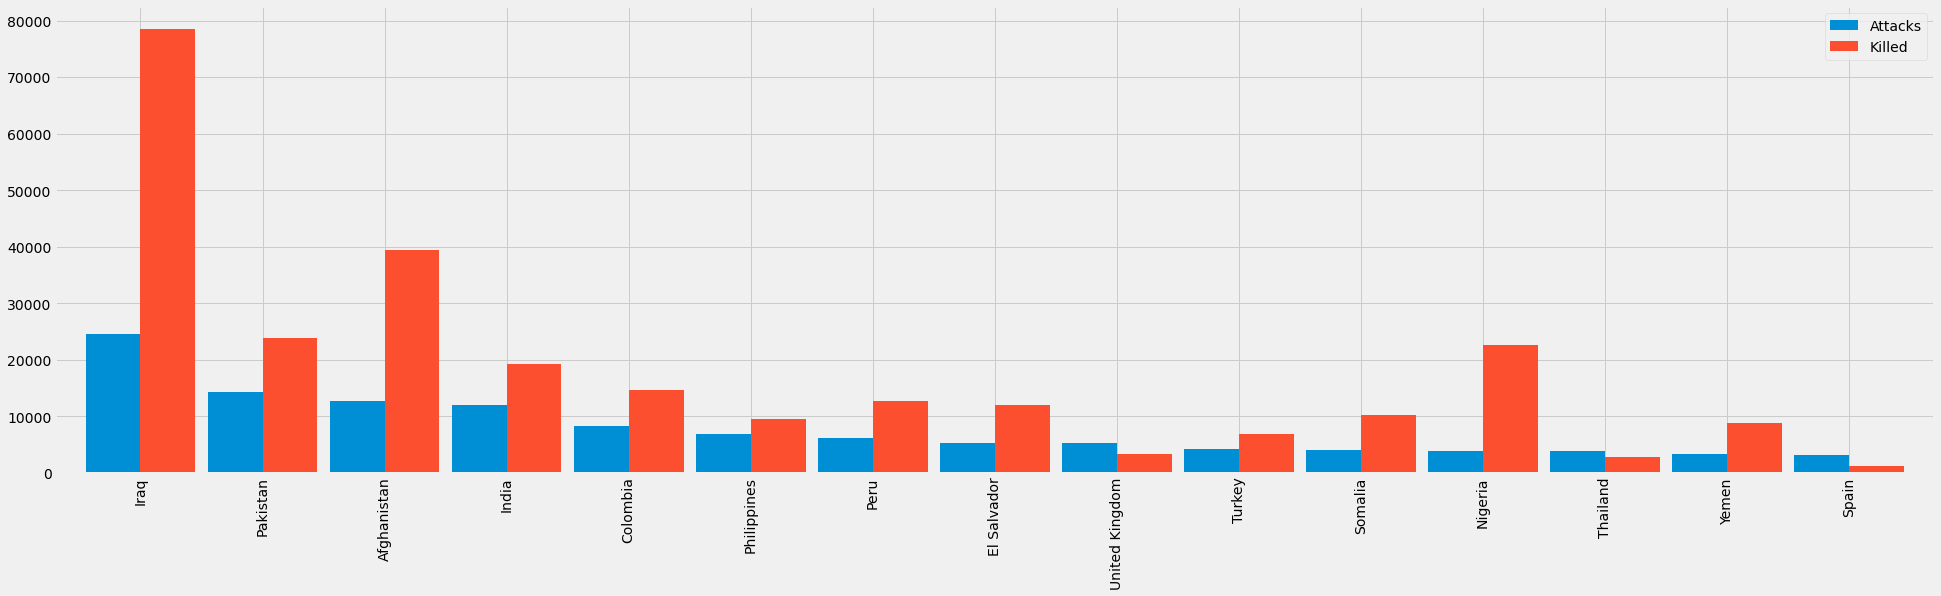

In [16]:

coun_terror=terror['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(30,8)
plt.show()

Look at the killed bar for Iraq. The number of killed is almost 3 folds more than attacks for Iraq. Thus the densely populated theory holds good.

#### Most Notorious Groups

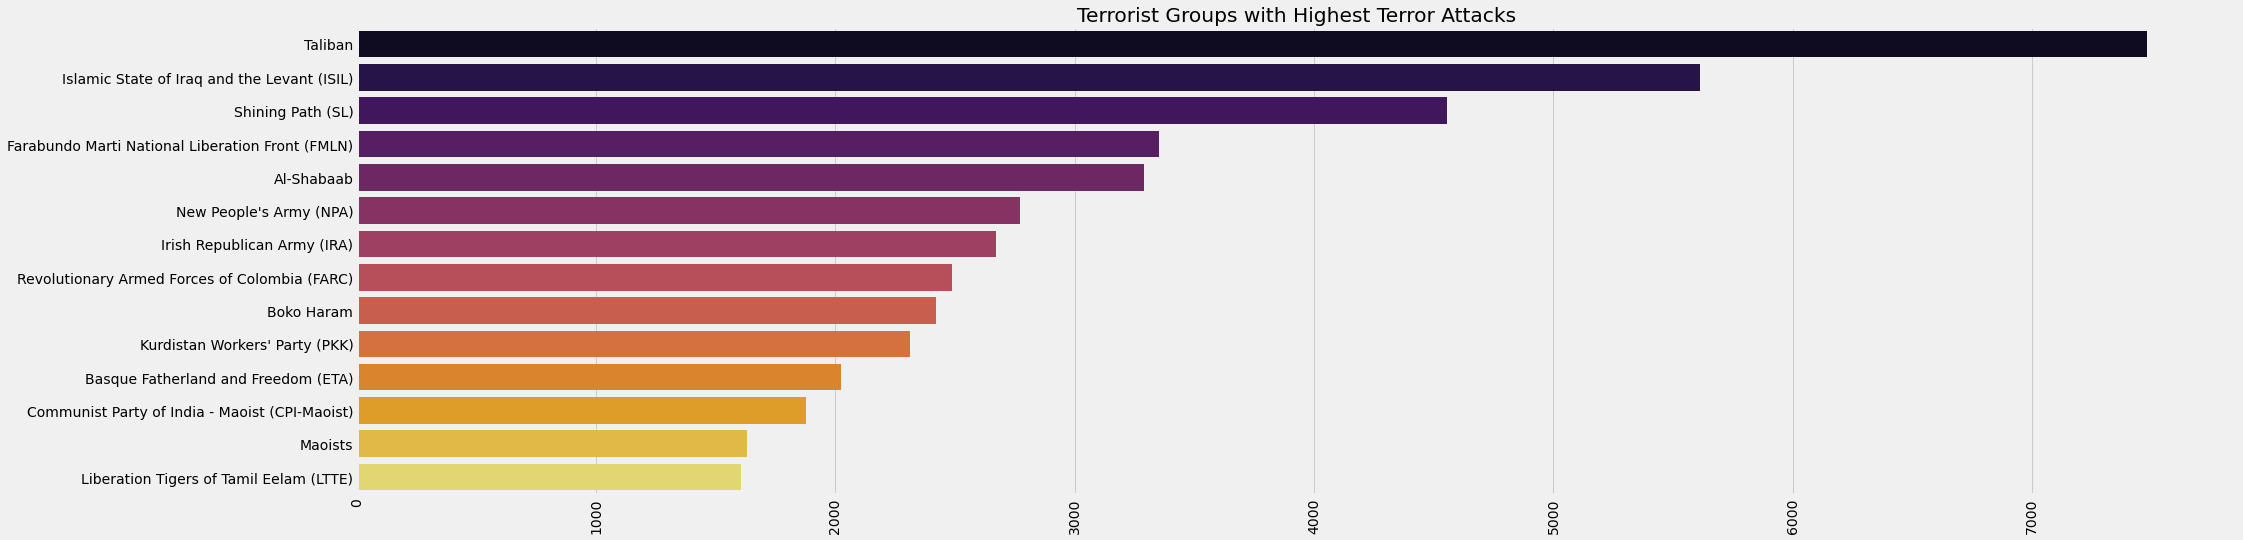

In [17]:

sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(30,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

#### Activity of Top Terrorist Groups

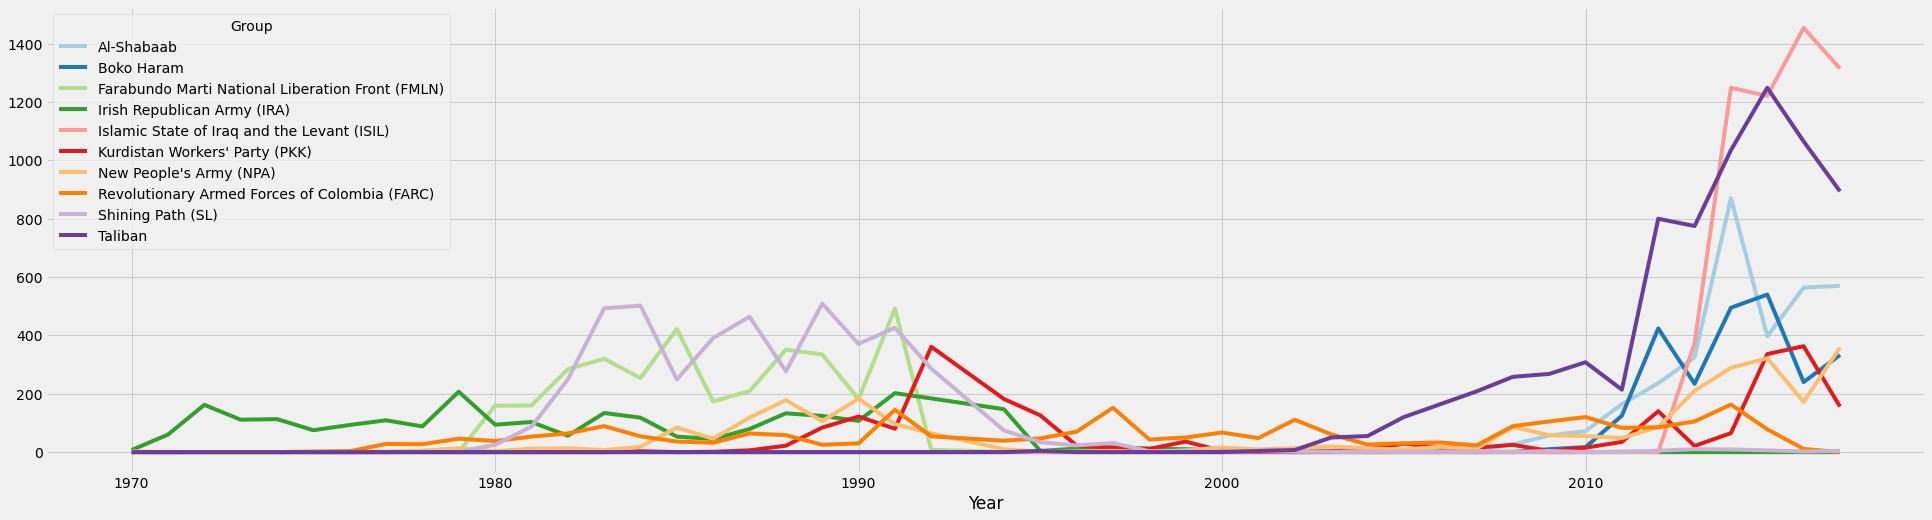

In [18]:

top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(30,8)
plt.show()

The Irish Republican Army(IRA), is the oldest terrorist group started back in the 1960-1970, maybe after the World War 2 due to the mass killing. However, it has probably stopped its activities in the late 90's. Some of the groups that have started lately in 2000's like the ISIL and Taliban, have shown a shoot in the number of attacks in the past years.

#### Regions Attacked By Terrorist Groups

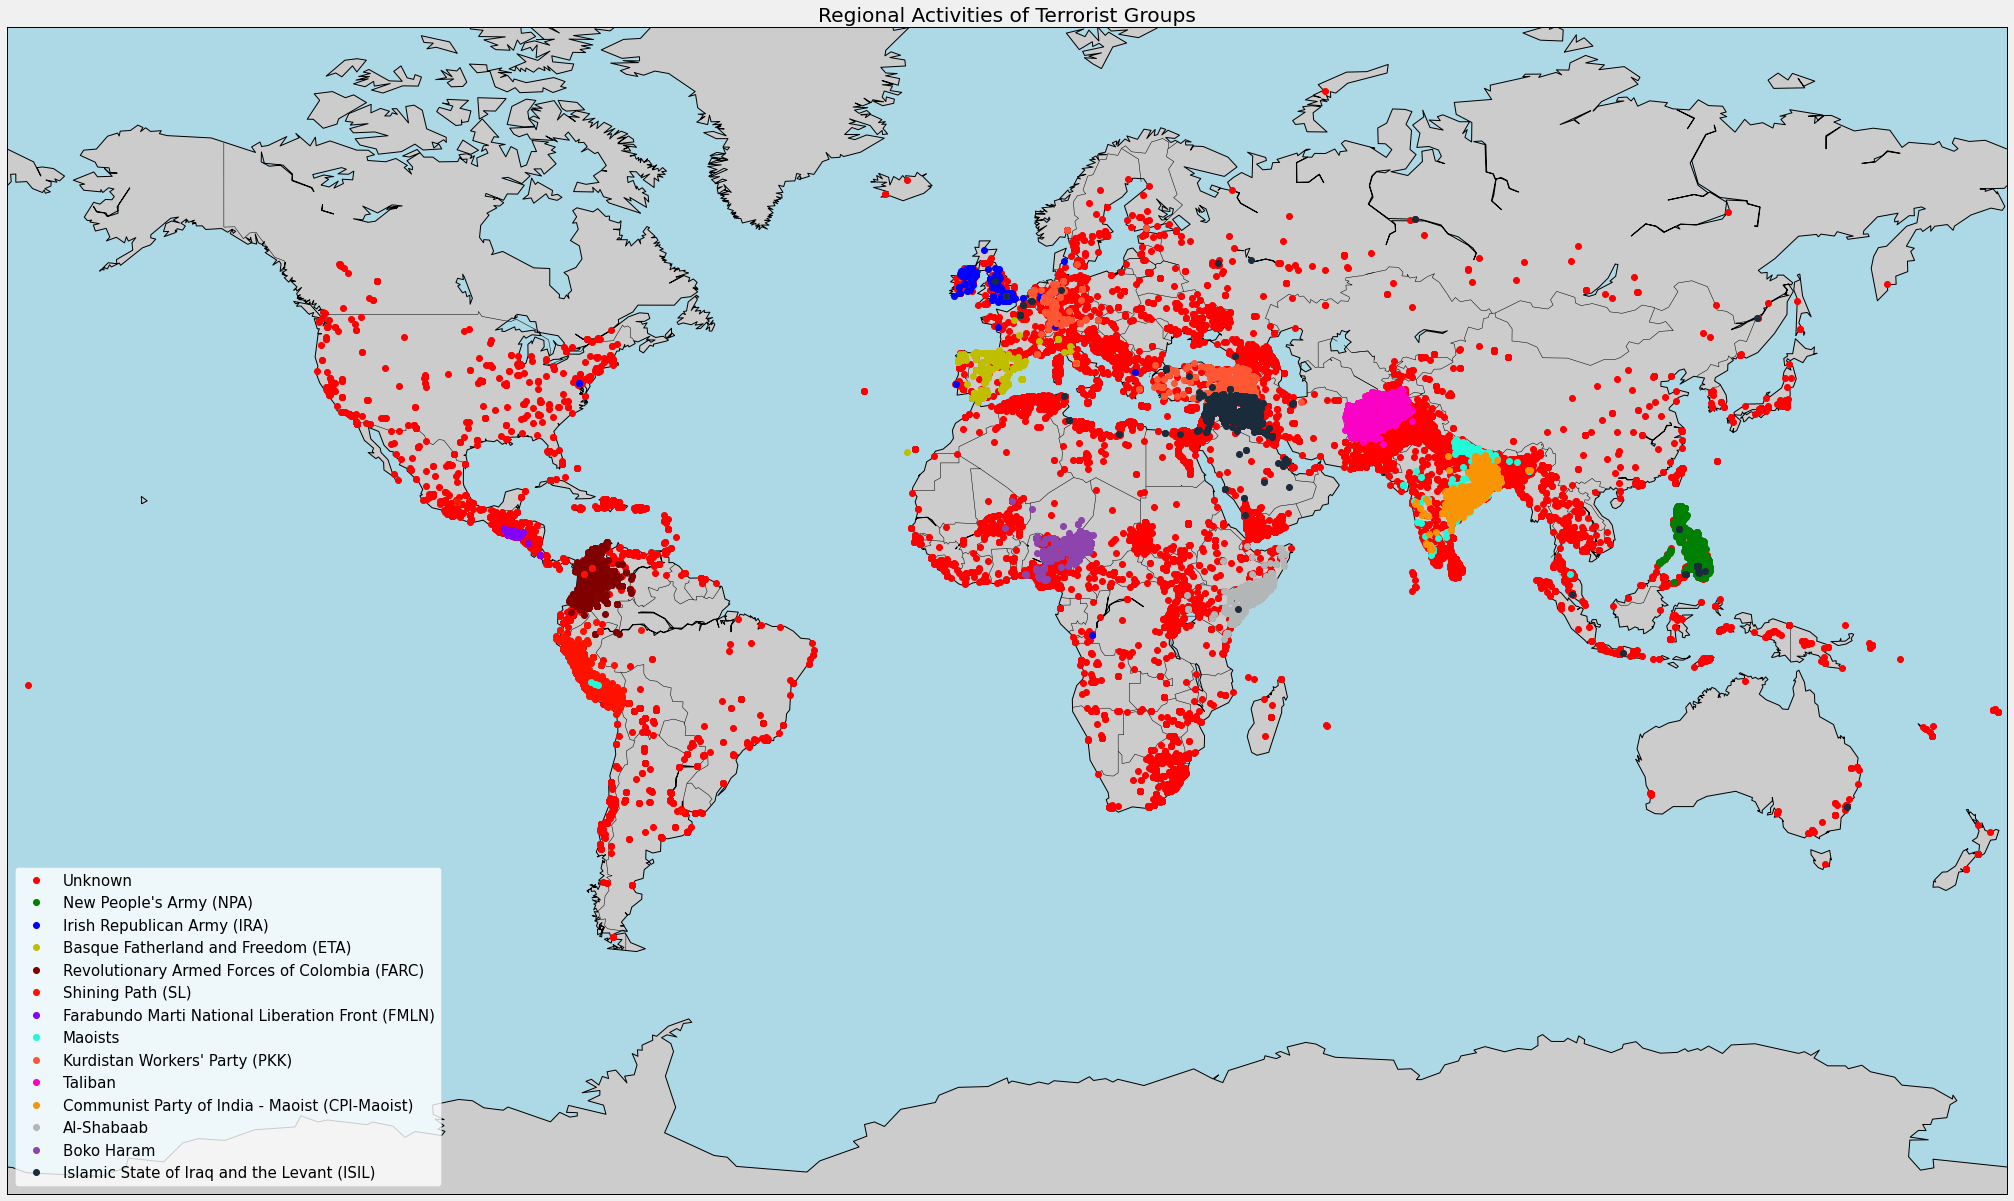

In [19]:

top_groups=terror[terror['Group'].isin(terror['Group'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='lightblue')
m4.drawmapboundary(fill_color='lightblue')
fig=plt.gcf()
fig.set_size_inches(50,20)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group=list(top_groups['Group'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['Group']==group].latitude)
    long_group=list(top_groups[top_groups['Group']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=6,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':15})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups')
plt.show()

The basemap clearly shows the regions of activity by the groups. ISIL is looks to be the notorious group in Iran and Iraq or broadly Middle-East. Similarly Taliban is concentrated in Afghanistan and Pakistan.

The Unknown markers, are maybe due to be an individual attack due to any resentment or personal grudges or any non-famous groups.

#### Terror activities in India

In [20]:

# terrorist attacks in India only
terror_ind = terror[(terror.Country == 'India')]
terror_ind.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,suicide,casualities
1186,1972,2,22,India,South Asia,New Delhi,28.585836,77.153336,Hijacking,0.0,0.0,B-747,NaN,Palestinians,Airports & Aircraft,Explosives,NaN,0,0.0
2764,1975,1,2,India,South Asia,Samastipur,25.863042,85.781004,Bombing/Explosion,4.0,0.0,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,Unknown,0,4.0
3857,1976,5,26,India,South Asia,New Delhi,28.585836,77.153336,Bombing/Explosion,0.0,0.0,New Delhi airport,NaN,Unknown,Airports & Aircraft,Explosives,NaN,0,0.0
5327,1977,9,28,India,South Asia,Bombay,19.075984,72.877656,Hijacking,0.0,0.0,DC-8,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,0,0.0
7337,1979,1,13,India,South Asia,Unknown,26.200605,92.937574,Armed Assault,NaN,NaN,patrol,NaN,Naga People,Police,Firearms,NaN,0,NaN


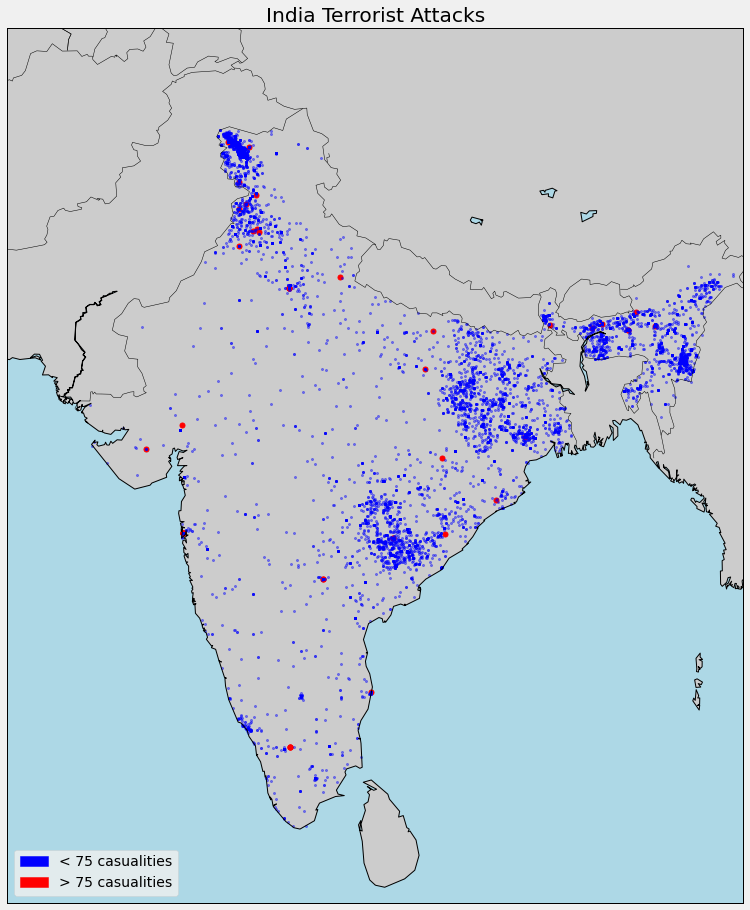

In [21]:

m4 = Basemap(width=1200000,height=900000,projection='lcc',resolution='l',
                    llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)

lat_200=list(terror_ind[terror_ind['casualities']>=75].latitude)
long_200=list(terror_ind[terror_ind['casualities']>=75].longitude)

x_200 , y_200 = m4(long_200,lat_200)

m4.plot(x_200, y_200,'go',markersize=5,color = 'r')
lat_=list(terror_ind[terror_ind['casualities']<75].latitude)
long_=list(terror_ind[terror_ind['casualities']<75].longitude)
x_1 , y_1 = m4(long_,lat_)

m4  .plot(x_1, y_1,'go',markersize=2,color = 'b',alpha=0.4)

m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='lightblue')
m4.drawmapboundary(fill_color='lightblue')

fig=plt.gcf()
fig.set_size_inches(40,15)
plt.title('India Terrorist Attacks')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 75 casualities"),
                    mpatches.Patch(color='red',label='> 75 casualities')])
plt.show()

Most Notorious Groups in India and Favorite Attack Types

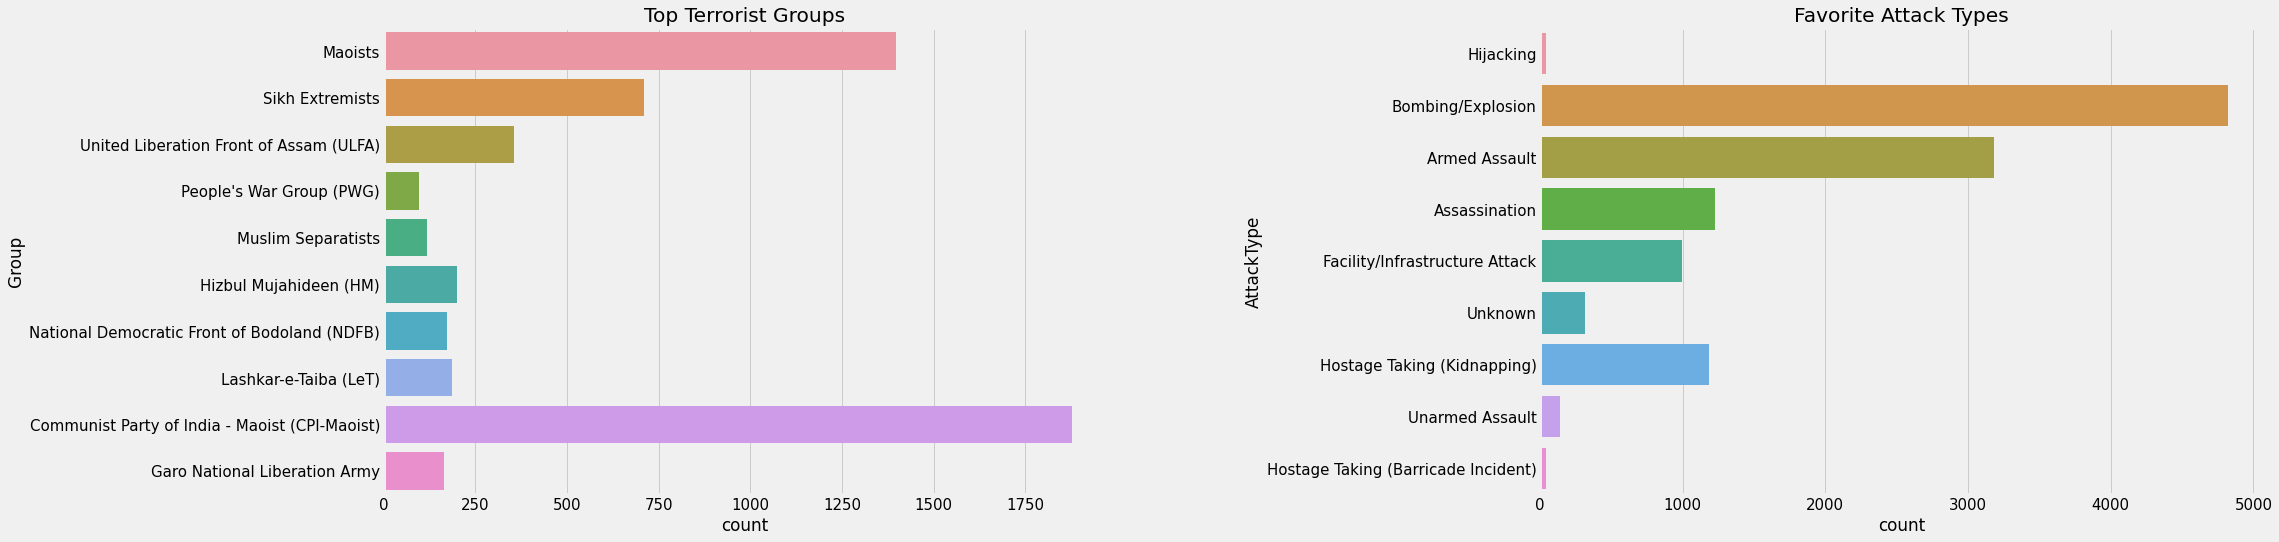

In [22]:

f,ax=plt.subplots(1,2,figsize=(30,8))
ind_groups=terror_ind['Group'].value_counts()[1:11].index
ind_groups=terror_ind[terror_ind['Group'].isin(ind_groups)]
sns.countplot(y='Group',data=ind_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='AttackType',data=terror_ind,ax=ax[1])
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

#### Get Data Ready for Modeling (Data Preparation)

For this analysis, We have chosen specific variables that are not highly correlated with chosen groups i.e. target type, weapon type, attack type, suicide attack and a number of fatalities while excluding the observations where the value is “Unknown”.

In [23]:
terror_model_df = terror[(terror.Target_type != "Unknown") & (terror.Target_type != "Other") & (terror.Weapon_type != "Unknown") & (terror.AttackType != "Unknown") & (terror.Group !="Unknown")]
terror_model_df['nkill'] = terror_model_df['Killed']

terror_model_df

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,suicide,casualities,nkill
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0,0.0,0.0
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN,0,0.0,0.0
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,0,0.0,0.0
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,0,0.0,0.0
10,1970,1,1,United States,North America,Baraboo,43.468500,-89.744299,Bombing/Explosion,0.0,0.0,Badger Army ammo depot.,NaN,"Weather Underground, Weathermen",Military,Explosives,NaN,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181683,2017,12,31,Afghanistan,South Asia,Kohistan district,35.315467,64.815508,Armed Assault,6.0,0.0,House of Member,12/31/2017: Assailants attacked the house of a...,Taliban,Terrorists/Non-State Militia,Firearms,"The specific motive is unknown; however, sourc...",0,6.0,6.0
181684,2017,12,31,India,South Asia,Hungrum,25.180162,93.015788,Hostage Taking (Kidnapping),0.0,0.0,Personal Security Officer of Council Member Ih...,12/31/2017: Assailants abducted Prafulla Phuka...,Zeliangrong United Front,Government (General),Firearms,NaN,0,0.0,0.0
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN,0,3.0,1.0
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN,0,9.0,2.0


In [24]:
f = lambda x : "0 Killed" if x == 0 else ("1 to 5 Killed" if (x >= 1 and x <= 5) else ("6 to 10 Killed" if (x > 5 and x <= 10) else ("11 to 50 Killed" if x > 10 and x <= 50 else ("more than 50 Killed"))))
terror_model_df['Killed'] = terror_model_df['Killed'].map(f)

In [25]:
terror_model_df = terror_model_df[['Group','Target_type','Weapon_type','AttackType','suicide','Killed', 'city', 'nkill', 'Country', 'Region']]

In [26]:
terror_model_df

,Group,Target_type,Weapon_type,AttackType,suicide,Killed,city,nkill,Country,Region
5,Black Nationalists,Police,Firearms,Armed Assault,0,0 Killed,Cairo,0.0,United States,North America
6,Tupamaros (Uruguay),Police,Firearms,Assassination,0,0 Killed,Montevideo,0.0,Uruguay,South America
8,New Year's Gang,Military,Incendiary,Facility/Infrastructure Attack,0,0 Killed,Madison,0.0,United States,North America
9,New Year's Gang,Government (General),Incendiary,Facility/Infrastructure Attack,0,0 Killed,Madison,0.0,United States,North America
10,"Weather Underground, Weathermen",Military,Explosives,Bombing/Explosion,0,0 Killed,Baraboo,0.0,United States,North America
...,...,...,...,...,...,...,...,...,...,...
181683,Taliban,Terrorists/Non-State Militia,Firearms,Armed Assault,0,6 to 10 Killed,Kohistan district,6.0,Afghanistan,South Asia
181684,Zeliangrong United Front,Government (General),Firearms,Hostage Taking (Kidnapping),0,0 Killed,Hungrum,0.0,India,South Asia
181686,Al-Shabaab,Military,Firearms,Armed Assault,0,1 to 5 Killed,Ceelka Geelow,1.0,Somalia,Sub-Saharan Africa
181687,Muslim extremists,Military,Explosives,Bombing/Explosion,0,1 to 5 Killed,Jableh,2.0,Syria,Middle East & North Africa


Shorten lengthy names for Visualisation

In [27]:
terror_model_df['Weapon_type'].replace(to_replace= 'Explosives/Bombs/Dynamite', value = 'Explosives', inplace=True )
terror_model_df['AttackType'].replace(to_replace= 'Facility/Infrastructure Attack', value = 'Facility/Infra.', inplace=True )
terror_model_df['Target_type'].replace(to_replace= 'Private Citizens & Property', value = 'Civilians', inplace=True )
terror_model_df['Target_type'].replace(to_replace= 'Terrorists/Non-State Militia', value = 'Non-State Militia', inplace=True )
terror_model_df['Target_type'].replace(to_replace= 'Religious Figures/Institutions', value = 'Religious Figures', inplace=True )
terror_model_df

#terror_model_df.to_csv('terror_model_df.csv', encoding="utf-8", index=False)

,Group,Target_type,Weapon_type,AttackType,suicide,Killed,city,nkill,Country,Region
5,Black Nationalists,Police,Firearms,Armed Assault,0,0 Killed,Cairo,0.0,United States,North America
6,Tupamaros (Uruguay),Police,Firearms,Assassination,0,0 Killed,Montevideo,0.0,Uruguay,South America
8,New Year's Gang,Military,Incendiary,Facility/Infra.,0,0 Killed,Madison,0.0,United States,North America
9,New Year's Gang,Government (General),Incendiary,Facility/Infra.,0,0 Killed,Madison,0.0,United States,North America
10,"Weather Underground, Weathermen",Military,Explosives,Bombing/Explosion,0,0 Killed,Baraboo,0.0,United States,North America
...,...,...,...,...,...,...,...,...,...,...
181683,Taliban,Non-State Militia,Firearms,Armed Assault,0,6 to 10 Killed,Kohistan district,6.0,Afghanistan,South Asia
181684,Zeliangrong United Front,Government (General),Firearms,Hostage Taking (Kidnapping),0,0 Killed,Hungrum,0.0,India,South Asia
181686,Al-Shabaab,Military,Firearms,Armed Assault,0,1 to 5 Killed,Ceelka Geelow,1.0,Somalia,Sub-Saharan Africa
181687,Muslim extremists,Military,Explosives,Bombing/Explosion,0,1 to 5 Killed,Jableh,2.0,Syria,Middle East & North Africa
